<a href="https://colab.research.google.com/github/anilkumarKanasani/Google_colab_notebooks/blob/main/Analysing_Iris_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connection to Data Base ( Kaggle )

In [1]:
# Mounting Google Drive to CoLab
from google.colab import drive
drive.mount('/content/drive')
import os
from drive.MyDrive.kaggle_auth import user_name , key
# Logging into Kaggle
os.environ['KAGGLE_USERNAME'] = user_name
os.environ['KAGGLE_KEY'] = key

# Getting the Iris Data from Kaggle
!kaggle datasets download -d uciml/iris
# Unzip the downloaded data
!unzip iris.zip 

Mounted at /content/drive
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 5.94MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


# DATA PRE PROCESSING 

In [2]:
# Importing all the requried packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Iris.csv" , index_col="Id")
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa


Checking for any Null Values in Input data 

In [4]:
df.isnull().values.any()

False

There is no null values at all. No need to fill at all.

Removing "Iris-" from all names in Species column.

In [26]:
try:
  df.Species = df.Species.apply(lambda x : x.split('-')[1])
except:
  pass
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


# EXPLORATORY DATA ANALYSIS :-

In [21]:
round ( df.describe() , ndigits = 2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


All the four parameters are in different distributions and are having different means and standard deviations.

![flower_image](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

In [25]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We have total 3 different categories of flowers.

*   Setosa
*   Versicolor
*   Virginica



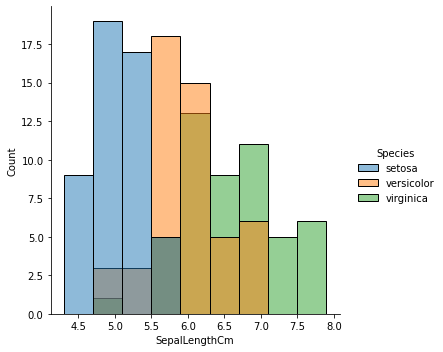

In [29]:
sns.displot(data=df ,
            x = "SepalLengthCm",
            hue = "Species")